## **Import libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [3]:
import gdown
import zipfile
import os

# Create a folder to store the downloaded and extracted files
folder_path = '/content/dataset_folder'
os.makedirs(folder_path, exist_ok=True)

# URL of the file to download from Google Drive
file_url = 'https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'

# Download the file using gdown
output_file = os.path.join(folder_path, 'dataset.zip')
gdown.download(file_url, output_file, quiet=False)

# Extract the downloaded zip file
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

# List files in the extracted folder
extracted_files = os.listdir(folder_path)
print("Files extracted:", extracted_files)


Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset_folder/dataset.zip
100%|██████████| 65.7M/65.7M [00:00<00:00, 256MB/s]


Files extracted: ['no', 'yes', 'dataset.zip']


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [4]:
# Define the parameters for loading the images
batch_size = 32  # Set your batch size
image_size = (224, 224)  # Set the desired image size (width, height)
main_directory = '/content/dataset_folder'

# Create a generator to load images for training
train_data = keras.utils.image_dataset_from_directory(
    main_directory,
    labels="inferred",
    image_size=image_size,
    shuffle=True,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed = 123
)

# Create a generator to load images for validation
validation_data = keras.utils.image_dataset_from_directory(
    main_directory,
    labels="inferred",
    image_size=image_size,
    shuffle=True,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed = 123
)
#all_data
all_data = keras.utils.image_dataset_from_directory(
    main_directory,
    labels="inferred",
    image_size=image_size,
    shuffle=True,
    batch_size=batch_size
)
# Accessing the loaded images and labels
for images, labels in train_data:
    # 'images' is a batch of images with shape (batch_size, width, height, channels)
    # 'labels' is a batch of labels

    # Perform operations or use the batches of images and labels as needed
    # For example, print the shape of the loaded batch of images
    print("Shape of batch of images:", images.shape)
    print("Labels:", labels)

    # Break the loop to only retrieve the first batch
    break

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.
Found 3000 files belonging to 2 classes.
Shape of batch of images: (32, 224, 224, 3)
Labels: tf.Tensor([1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1], shape=(32,), dtype=int32)


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

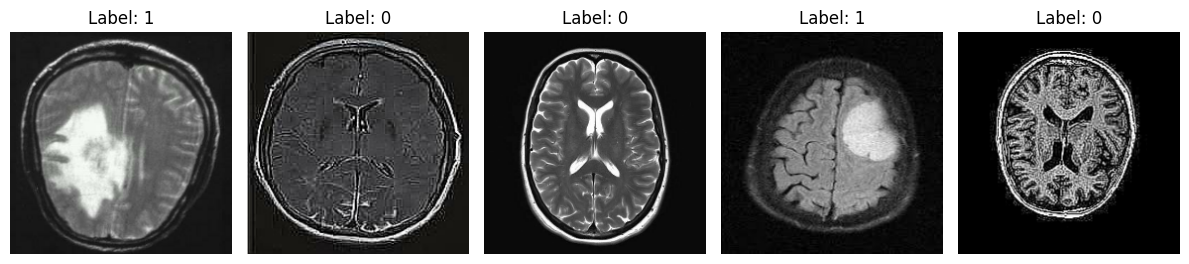

In [5]:
num_samples = 5
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [6]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),  # Input layer based on the image size and channels
    layers.Conv2D(16, (3, 3), activation='relu'),  # Convolutional layer with ReLU activation
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Flatten(),  # Flatten layer to prepare for dense layers
    layers.Dense(32, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 197136)            0         
                                                                 
 dense (Dense)               (None, 32)                6308384   
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6308865 (24.07 MB)
Trainable params: 6308865 (24.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

### **Train the model**

In [7]:
history =  model.fit(train_data, epochs=10)

Epoch 1/10
75/75 [==============================] - 7s 42ms/step - loss: 149.7569 - accuracy: 0.5479
Epoch 2/10
75/75 [==============================] - 6s 72ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 3/10
75/75 [==============================] - 3s 43ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 4/10
75/75 [==============================] - 5s 66ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 5/10
75/75 [==============================] - 4s 46ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 6/10
75/75 [==============================] - 5s 59ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 7/10
75/75 [==============================] - 4s 51ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 8/10
75/75 [==============================] - 3s 41ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 9/10
75/75 [==============================] - 3s 42ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 10/10
75/75 [==============================] - 5s 67ms/step - loss: 0.6932 - accuracy: 0.5017


### **Test the model**

In [8]:
sequential_model_evaluation = model.evaluate(validation_data)
print("Sequential API Model - Loss:", sequential_model_evaluation[0])
print("Sequential API Model - Accuracy:", sequential_model_evaluation[1])

19/19 [==============================] - 1s 38ms/step - loss: 0.6932 - accuracy: 0.4933
Sequential API Model - Loss: 0.6932000517845154
Sequential API Model - Accuracy: 0.4933333396911621


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

Epoch 1/20
75/75 [==============================] - 6s 61ms/step - loss: 233.2992 - accuracy: 0.7321 - val_loss: 4.6566 - val_accuracy: 0.7967
Epoch 2/20
75/75 [==============================] - 5s 67ms/step - loss: 1.9613 - accuracy: 0.9087 - val_loss: 2.4606 - val_accuracy: 0.8650
Epoch 3/20
75/75 [==============================] - 5s 58ms/step - loss: 0.5638 - accuracy: 0.9583 - val_loss: 0.8308 - val_accuracy: 0.9583
Epoch 4/20
75/75 [==============================] - 6s 79ms/step - loss: 0.2770 - accuracy: 0.9683 - val_loss: 0.5878 - val_accuracy: 0.9467
Epoch 5/20
75/75 [==============================] - 4s 54ms/step - loss: 0.1127 - accuracy: 0.9896 - val_loss: 0.8546 - val_accuracy: 0.9600
Epoch 6/20
75/75 [==============================] - 4s 54ms/step - loss: 0.0325 - accuracy: 0.9925 - val_loss: 0.5158 - val_accuracy: 0.9733
Epoch 7/20
75/75 [==============================] - 6s 82ms/step - loss: 0.0533 - accuracy: 0.9900 - val_loss: 2.0147 - val_accuracy: 0.9100
Epoch 8/20


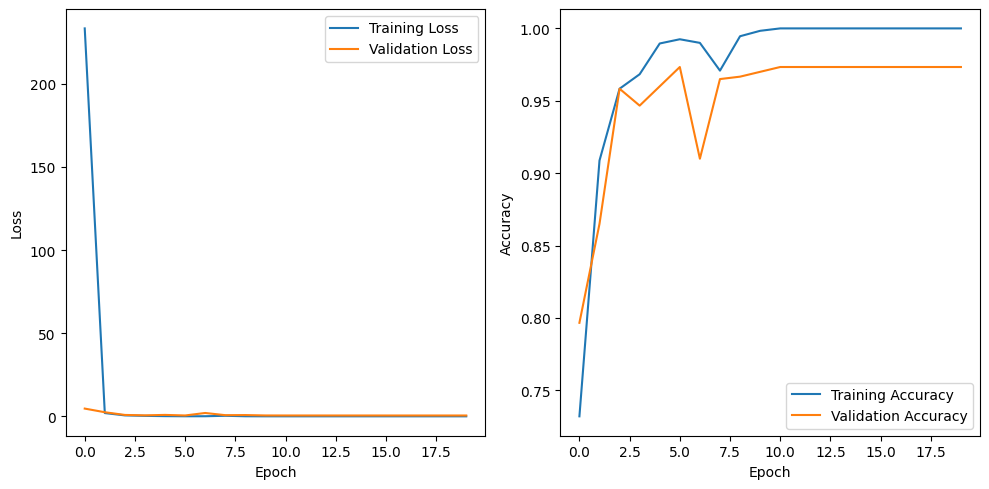

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf

model2 = keras.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),  # Input layer based on the image size and channels
    layers.Conv2D(16, (3, 3), activation='relu'),  # Convolutional layer with ReLU activation
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Flatten(),  # Flatten layer to prepare for dense layers
    layers.Dense(32, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_data, validation_data=validation_data, epochs=20)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(history.history)
print(sequential_model_evaluation)

{'loss': [0.0001567600411362946, 0.00014404238027054816, 0.00013399829913396388, 0.00012529405648820102, 0.00011056656512664631, 0.00010726669279392809, 9.524943016003817e-05, 8.957979298429564e-05, 8.391849405597895e-05, 7.96414606156759e-05, 7.746097980998456e-05, 6.87835636199452e-05, 6.50534566375427e-05, 6.391042552422732e-05, 5.682713526766747e-05, 5.403718751040287e-05, 5.1227587391622365e-05, 4.8572550440439954e-05, 4.5579745346913114e-05, 4.456408350961283e-05], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
[0.46639949083328247, 0.9750000238418579]


## **2.Functional API**

### **Build a model**

In [12]:
# Define the CNN model using Functional API
inputs = keras.Input(shape=(224, 224, 3))  # Input layer
x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)  # Convolutional layer with ReLU activation
x = layers.MaxPooling2D((2, 2))(x)  # Max pooling layer
x = layers.Flatten()(x)  # Flatten layer
x = layers.Dense(32, activation='relu')(x)  # Dense layer with ReLU activation
outputs = layers.Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification

# Create the model
model_F = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_F.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Train the model**

In [13]:
# Train the model using the generator
history_F = model_F.fit(train_data, epochs=10)

Epoch 1/10
75/75 [==============================] - 5s 44ms/step - loss: 74.0132 - accuracy: 0.7767
Epoch 2/10
75/75 [==============================] - 8s 109ms/step - loss: 1.5675 - accuracy: 0.9413
Epoch 3/10
75/75 [==============================] - 5s 58ms/step - loss: 0.1866 - accuracy: 0.9808
Epoch 4/10
75/75 [==============================] - 6s 73ms/step - loss: 0.1041 - accuracy: 0.9887
Epoch 5/10
75/75 [==============================] - 4s 49ms/step - loss: 0.0979 - accuracy: 0.9887
Epoch 6/10
75/75 [==============================] - 5s 63ms/step - loss: 0.0537 - accuracy: 0.9917
Epoch 7/10
75/75 [==============================] - 5s 59ms/step - loss: 0.0154 - accuracy: 0.9962
Epoch 8/10
75/75 [==============================] - 6s 72ms/step - loss: 0.0068 - accuracy: 0.9975
Epoch 9/10
75/75 [==============================] - 3s 42ms/step - loss: 0.1402 - accuracy: 0.9921
Epoch 10/10
75/75 [==============================] - 5s 60ms/step - loss: 0.3163 - accuracy: 0.9775


### **Test the model**

In [ ]:
functional_model_evaluation = model_F.evaluate(validation_data)
print("Functional API Model - Loss:", functional_model_evaluation[0])
print("Functional API Model - Accuracy:", functional_model_evaluation[1])

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

Epoch 1/20
75/75 [==============================] - 5s 55ms/step - loss: 1.4221 - accuracy: 0.9658 - val_loss: 1.0052 - val_accuracy: 0.9583
Epoch 2/20
75/75 [==============================] - 6s 78ms/step - loss: 0.0506 - accuracy: 0.9896 - val_loss: 1.3158 - val_accuracy: 0.9583
Epoch 3/20
75/75 [==============================] - 5s 55ms/step - loss: 0.1683 - accuracy: 0.9887 - val_loss: 1.3456 - val_accuracy: 0.9433
Epoch 4/20
75/75 [==============================] - 4s 54ms/step - loss: 0.1542 - accuracy: 0.9846 - val_loss: 1.1378 - val_accuracy: 0.9683
Epoch 5/20
75/75 [==============================] - 6s 80ms/step - loss: 0.1266 - accuracy: 0.9875 - val_loss: 1.1984 - val_accuracy: 0.9617
Epoch 6/20
75/75 [==============================] - 4s 54ms/step - loss: 0.0928 - accuracy: 0.9933 - val_loss: 1.0611 - val_accuracy: 0.9650
Epoch 7/20
75/75 [==============================] - 5s 60ms/step - loss: 0.0281 - accuracy: 0.9962 - val_loss: 0.7435 - val_accuracy: 0.9683
Epoch 8/20
75

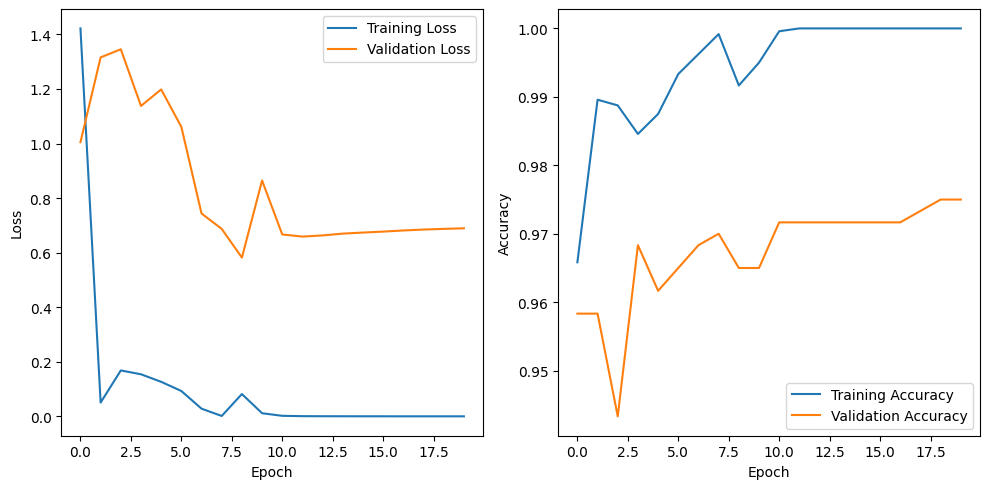

In [14]:
epochs = 20
# Create the model
model_F2 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_F2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_F2 = model_F2.fit(train_data, validation_data=validation_data, epochs=20)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_F2.history['loss'], label='Training Loss')
plt.plot(history_F2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_F2.history['accuracy'], label='Training Accuracy')
plt.plot(history_F2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()